In [1]:
# For numerical calculations
import numpy as np
import pandas as pd
import scipy as sp
import math
import matplotlib.animation as animation
from scipy.integrate import odeint
from numpy import arange
from pylab import *
from scipy.integrate import odeint
import scipy.optimize 
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from math import exp
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline
import git

# Find home directory for repo
#repo = git.Repo("./", search_parent_directories=True)
#homedir = repo.working_dir

# Import plotting features
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("ticks")
sns.set_palette("colorblind", color_codes=True)
sns.set_context("poster")

# Magic command to plot inline
%matplotlib inline

#To graph in SVG (high def)
%config InlineBackend.figure_format="svg"

## Plots of concentration vs. depth

In [2]:
# Import csv file
df_csv = pd.read_csv('/Users/daniosro/OneDrive - California ' 
             'Institute of Technology/1. Adkins/SR2113' 
             '/Xevo/S_intermediates.csv')
#See dataframe
df_csv.head()

,ID,Compound,Conc_nM,Core,Depth_cm,Real_depth_cm
0,42,Sulfite,14.524811,GC02,3,6.5
1,43,Sulfite,16.338317,GC02,12,15.5
2,40,Sulfite,21.184303,GC02,15,18.5
3,45,Sulfite,7.867032,GC02,18,21.5
4,39,Sulfite,21.179141,GC02,21,24.5


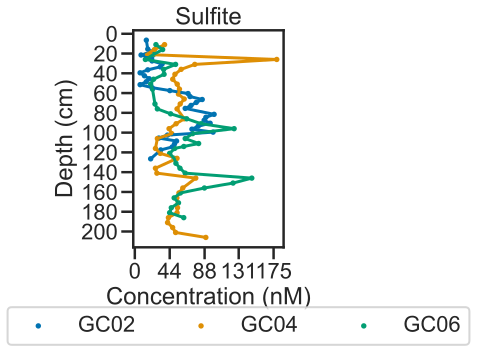

In [5]:
#Make plot for sulfite including all cores
df_sulfite= df_csv[(df_csv.Compound=='Sulfite') & (df_csv.Core!='MC01')]
#Group by core
df_group = df_sulfite.groupby("Core")

fig, ax = plt.subplots(figsize=(2.7,4))
for name, group in df_group:
    ax.scatter(group.Conc_nM, group.Real_depth_cm, s=12, label=name)
    
    ax.plot(group.Conc_nM, group.Real_depth_cm)
    #ynew = np.linspace(group.Real_depth_cm.min(), group.Real_depth_cm.max(), 300)
    #a = np.sort(group.Conc_nM.values)
    #print (a)
    #xnew = CubicSpline(np.sort(group.Conc_nM.values), np.sort(group.Real_depth_cm.values))

    #ax.plot(ynew,xnew(ynew))
    
    #xhat = savgol_filter(group.Conc_nM, 7, 5, mode='nearest') # window size 9, polynomial order 3
    
    #Plot the Savitzky-Golay curve for each core on top of the scatter plots
    #ax.plot(xhat, group.Real_depth_cm)
    
    # Set plot title
    ax.set_title('Sulfite')#, fontsize =16)

    #Invert y axis
    ax.invert_yaxis()
    ax.set_xlabel('Concentration (nM)')
    ax.set_ylabel('Depth (cm)')
    ax.set_yticks(np.arange(0, 220, 20.0))
    #ax.set_xticks(np.linspace(0, 15, 5).round(1)) 
    ax.set_xticks(np.linspace(0, 175, 5).round(0))
ax.legend(bbox_to_anchor=(0.7, -0.5), ncol=3, loc = 'lower center')

#Save figure
fig.savefig('/Users/daniosro/OneDrive - California Institute of Technology/1. Adkins/SR2113/sulfite_profile_poster.pdf', bbox_inches='tight')

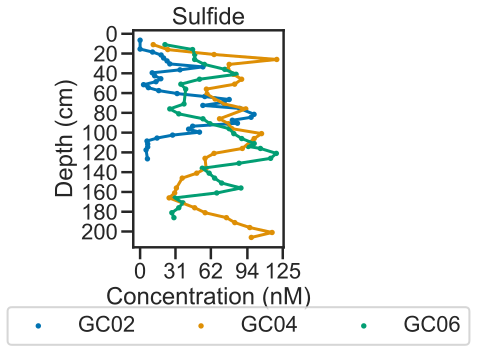

In [131]:
#Make plot for sulfide including all cores
df_sulfide= df_csv[(df_csv.Compound=='Sulfide') & (df_csv.Core!='MC01')]
#Group by core
df_group = df_sulfide.groupby("Core")

fig, ax = plt.subplots(figsize=(2.7,4))
for name, group in df_group:
    ax.scatter(group.Conc_nM, group.Real_depth_cm, s=12, label=name)
    
    ax.plot(group.Conc_nM, group.Real_depth_cm)
    #ynew = np.linspace(group.Real_depth_cm.min(), group.Real_depth_cm.max(), 300)
    #a = np.sort(group.Conc_nM.values)
    #print (a)
    #xnew = CubicSpline(np.sort(group.Conc_nM.values), np.sort(group.Real_depth_cm.values))

    #ax.plot(ynew,xnew(ynew))
    
    #xhat = savgol_filter(group.Conc_nM, 7, 5, mode='nearest') # window size 9, polynomial order 3
    
    #Plot the Savitzky-Golay curve for each core on top of the scatter plots
    #ax.plot(xhat, group.Real_depth_cm)
    
    # Set plot title
    ax.set_title('Sulfide')#, fontsize =16)

    #Invert y axis
    ax.invert_yaxis()
    ax.set_xlabel('Concentration (nM)')
    ax.set_ylabel('Depth (cm)')
    ax.set_yticks(np.arange(0, 220, 20.0))
    ax.set_xticks(np.linspace(0, 125, 5).round(0)) 
    #ax.set_xticks(np.arange(0, 1000, 100))
ax.legend(bbox_to_anchor=(0.7, -0.5), ncol=3, loc = 'lower center')

#Save figure
fig.savefig('/Users/daniosro/OneDrive - California Institute of Technology/1. Adkins/SR2113/sulfide_profile_poster.pdf', bbox_inches='tight')

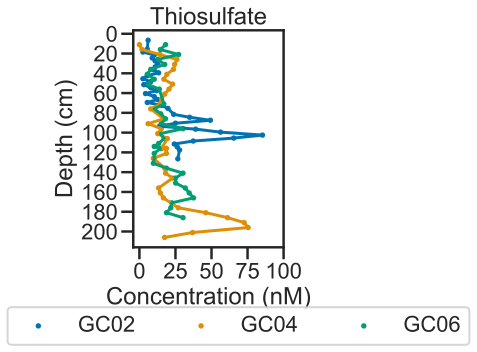

In [132]:
#Make plot for thiosulfate including all cores
df_thiosulfate= df_csv[(df_csv.Compound=='Thiosulfate') & (df_csv.Core!='MC01')]
#Group by core
df_group = df_thiosulfate.groupby("Core")

fig, ax = plt.subplots(figsize=(2.7,4))
for name, group in df_group:
    ax.scatter(group.Conc_nM, group.Real_depth_cm, s=12, label=name)
    
    ax.plot(group.Conc_nM, group.Real_depth_cm)
    #ynew = np.linspace(group.Real_depth_cm.min(), group.Real_depth_cm.max(), 300)
    #a = np.sort(group.Conc_nM.values)
    #print (a)
    #xnew = CubicSpline(np.sort(group.Conc_nM.values), np.sort(group.Real_depth_cm.values))

    #ax.plot(ynew,xnew(ynew))
    
    #xhat = savgol_filter(group.Conc_nM, 7, 5, mode='nearest') # window size 9, polynomial order 3
    
    #Plot the Savitzky-Golay curve for each core on top of the scatter plots
    #ax.plot(xhat, group.Real_depth_cm)
    
    # Set plot title
    ax.set_title('Thiosulfate')#, fontsize =16)

    #Invert y axis
    ax.invert_yaxis()
    ax.set_xlabel('Concentration (nM)')
    ax.set_ylabel('Depth (cm)')
    ax.set_yticks(np.arange(0, 220, 20.0))
    ax.set_xticks(np.linspace(0, 100, 5).round(0)) 
ax.legend(bbox_to_anchor=(0.7, -0.5), ncol=3, loc = 'lower center')

#Save figure
fig.savefig('/Users/daniosro/OneDrive - California Institute of Technology/1. Adkins/SR2113/thiosulfate_profile_poster.pdf', bbox_inches='tight')

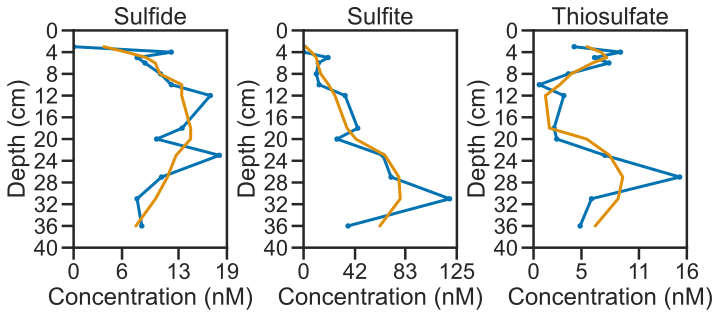

In [8]:
#Depth profile of multicore

# Filter by multicore
df_mc = df_csv[(df_csv.Core=='MC01')]
#Group by core
df_group = df_mc.groupby("Compound")
# Initialize figure
fig, ax = plt.subplots(1, 3, figsize=(11, 4))

# Loop through cores
for i, (group, data) in enumerate(df_group):
    # Plot data
    ax[i].scatter(data.Conc_nM, data.Real_depth_cm, s=12)
    ax[i].plot(data.Conc_nM, data.Real_depth_cm)
    #Create a Savitzky-Golay filter
    xhat = savgol_filter(data.Conc_nM, 7, 3, mode='nearest') # window size 51, polynomial order 3
    
    #Plot the Savitzky-Golay curve for each core on top of the scatter plots
    ax[i].plot(xhat, data.Real_depth_cm)
    ax[i].set_title(group)
    ax[i].set_xlabel('Concentration (nM)')
    ax[i].set_ylabel('Depth (cm)')
   
    ax[i].set_yticks(np.linspace(40, 0, 11).round(0))
    ax[i].set_xticks(np.linspace(0, ax[i].get_xbound()[1],4).round(0))
    #Make all plots start at depth 0 and end at 37
    ax[i].set_ylim(bottom=0)
    ax[i].set_ylim(top=40)
    ax[i].set_xlim(0)
    #Invert y axis
    ax[i].invert_yaxis()
# Increase spacing among subplots
plt.subplots_adjust(wspace=0.3)

# Set spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.5)

#Save figure
#fig.savefig('/Users/daniosro/OneDrive - California Institute of Technology/1. Adkins/SR2113/mc_sintermediates_profile_poster.pdf', bbox_inches='tight')

## Crossplots

In [3]:
df_sulfite= df_csv[(df_csv.Compound=='Sulfite')]
df_sulfite.head()

,ID,Compound,Conc_nM,Core,Depth_cm,Real_depth_cm
0,42,Sulfite,14.524811,GC02,3,6.5
1,43,Sulfite,16.338317,GC02,12,15.5
2,40,Sulfite,21.184303,GC02,15,18.5
3,45,Sulfite,7.867032,GC02,18,21.5
4,39,Sulfite,21.179141,GC02,21,24.5


In [4]:
df_sulfide= df_csv[(df_csv.Compound=='Sulfide')]
df_sulfide.head()

,ID,Compound,Conc_nM,Core,Depth_cm,Real_depth_cm
241,42,Sulfide,0.000000,GC02,3,6.5
242,43,Sulfide,0.000000,GC02,12,15.5
243,40,Sulfide,10.894785,GC02,15,18.5
244,45,Sulfide,18.430000,GC02,18,21.5
245,39,Sulfide,20.574022,GC02,21,24.5


In [5]:
df_thiosulfate= df_csv[(df_csv.Compound=='Thiosulfate')]
df_thiosulfate.head()

,ID,Compound,Conc_nM,Core,Depth_cm,Real_depth_cm
119,42,Thiosulfate,6.052004,GC02,3,6.5
120,43,Thiosulfate,5.446106,GC02,12,15.5
121,40,Thiosulfate,2.421063,GC02,15,18.5
122,45,Thiosulfate,10.287658,GC02,18,21.5
123,39,Thiosulfate,8.850000,GC02,21,24.5


### Sulfite vs. sulfide

In [6]:
#Fuse dataframes
df_sulfide_sulfite_crossplot=df_sulfide.merge(df_sulfite, how='left',
                 left_on=['ID'] , right_on=['ID'] ) 
#Rename columns
df_sulfide_sulfite_crossplot = df_sulfide_sulfite_crossplot.rename(columns={"Conc_nM_x": "Conc_nM_sulfide", 
                                                                        "Conc_nM_y": "Conc_nM_sulfite",
                                                                        "Depth_cm_x": "Depth_cm",
                                                                        "Real_depth_cm_x": "Real_depth_cm",
                                                                           "Core_x":"Core"})
#Remove unnecessary columns
df_sulfide_sulfite_crossplot = df_sulfide_sulfite_crossplot.drop(columns=['Compound_x', 'Compound_y', 'Depth_cm_y', 'Real_depth_cm_y','Core_y'])
#Show dataframe
df_sulfide_sulfite_crossplot.head()

,ID,Conc_nM_sulfide,Core,Depth_cm,Real_depth_cm,Conc_nM_sulfite
0,42,0.000000,GC02,3,6.5,14.524811
1,43,0.000000,GC02,12,15.5,16.338317
2,40,10.894785,GC02,15,18.5,21.184303
3,45,18.430000,GC02,18,21.5,7.867032
4,39,20.574022,GC02,21,24.5,21.179141


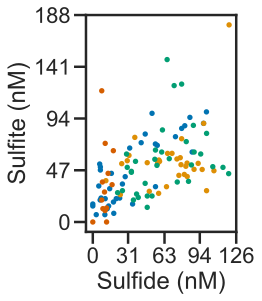

In [22]:
#Group by core
df_group = df_sulfide_sulfite_crossplot.groupby("Core")

fig, ax = plt.subplots(figsize=(2.7,4))
for i, (group,data) in enumerate(df_group):
    # Get Unique core labels
    color_labels = sort(df_sulfide_sulfite_crossplot['Core'].unique())
    # Define colors
    colors = sns.color_palette("colorblind", len(color_labels))
    # Create dictionary that pairs core labels with colors
    color_map = dict(zip(color_labels, colors))
    # Map core labels to the colors
    color = data['Core'].map(color_map)
    
    #Make errorbar plot
    ax.scatter(data['Conc_nM_sulfide'], data['Conc_nM_sulfite'], s=12)

    #Invert y axis
    ax.invert_yaxis()
    ax.set_xlabel('Sulfide (nM)')
    ax.set_ylabel('Sulfite (nM)')
    ax.set_xticks(np.linspace(0, (ax.get_xbound()[1]), 5).round(0))
    ax.set_yticks(np.linspace(0, (ax.get_ybound()[1]), 5).round(2))
    #ax.legend(bbox_to_anchor=(0.5, -0.25), ncol=4, loc = 'lower center')

#Save figure
fig.savefig('/Users/daniosro/OneDrive - California Institute of Technology/1. Adkins/SR2113/crossplot_sulfite_sulfide.pdf', bbox_inches='tight')

### Sulfide vs. thiosulfate

In [7]:
#Fuse dataframes
df_sulfide_thiosulfate_crossplot=df_sulfide.merge(df_thiosulfate, how='left',
                 left_on=['ID'] , right_on=['ID'] )
df_sulfide_thiosulfate_crossplot.head()

,ID,Compound_x,Conc_nM_x,Core_x,Depth_cm_x,Real_depth_cm_x,Compound_y,Conc_nM_y,Core_y,Depth_cm_y,Real_depth_cm_y
0,42,Sulfide,0.000000,GC02,3,6.5,Thiosulfate,6.052004,GC02,3.0,6.5
1,43,Sulfide,0.000000,GC02,12,15.5,Thiosulfate,5.446106,GC02,12.0,15.5
2,40,Sulfide,10.894785,GC02,15,18.5,Thiosulfate,2.421063,GC02,15.0,18.5
3,45,Sulfide,18.430000,GC02,18,21.5,Thiosulfate,10.287658,GC02,18.0,21.5
4,39,Sulfide,20.574022,GC02,21,24.5,Thiosulfate,8.850000,GC02,21.0,24.5


In [8]:
#Rename columns
df_sulfide_thiosulfate_crossplot = df_sulfide_thiosulfate_crossplot.rename(columns={"Conc_nM_x": "Conc_nM_sulfide", 
                                                                        "Conc_nM_y": "Conc_nM_thiosulfate",
                                                                        "Depth_cm_x": "Depth_cm",
                                                                        "Real_depth_cm_x": "Real_depth_cm",
                                                                           "Core_x":"Core"})
#Remove unnecessary columns
df_sulfide_thiosulfate_crossplot = df_sulfide_thiosulfate_crossplot.drop(columns=['Compound_x', 'Compound_y', 'Depth_cm_y', 'Real_depth_cm_y','Core_y'])
#Show dataframe
df_sulfide_thiosulfate_crossplot.head()

,ID,Conc_nM_sulfide,Core,Depth_cm,Real_depth_cm,Conc_nM_thiosulfate
0,42,0.000000,GC02,3,6.5,6.052004
1,43,0.000000,GC02,12,15.5,5.446106
2,40,10.894785,GC02,15,18.5,2.421063
3,45,18.430000,GC02,18,21.5,10.287658
4,39,20.574022,GC02,21,24.5,8.850000


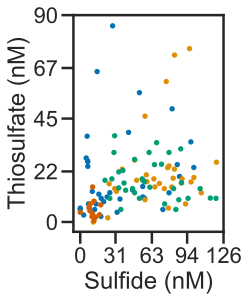

In [9]:
#Group by core
df_group = df_sulfide_thiosulfate_crossplot.groupby("Core")

fig, ax = plt.subplots(figsize=(2.7,4))
for i, (group,data) in enumerate(df_group):
    # Get Unique core labels
    color_labels = sort(df_sulfide_thiosulfate_crossplot['Core'].unique())
    # Define colors
    colors = sns.color_palette("colorblind", len(color_labels))
    # Create dictionary that pairs core labels with colors
    color_map = dict(zip(color_labels, colors))
    # Map core labels to the colors
    color = data['Core'].map(color_map)
    
    #Make errorbar plot
    ax.scatter(data['Conc_nM_sulfide'], data['Conc_nM_thiosulfate'], s=12)

    #Invert y axis
    ax.invert_yaxis()
    ax.set_xlabel('Sulfide (nM)')
    ax.set_ylabel('Thiosulfate (nM)')
    ax.set_xticks(np.linspace(0, (ax.get_xbound()[1]), 5).round(0))
    ax.set_yticks(np.linspace(0, (ax.get_ybound()[1]), 5).round(0))
    #ax.legend(bbox_to_anchor=(0.5, -0.25), ncol=4, loc = 'lower center')

#Save figure
fig.savefig('/Users/daniosro/OneDrive - California Institute of Technology/1. Adkins/SR2113/crossplot_sulfide_thiosulfate.pdf', bbox_inches='tight')

### Sulfite vs. thiosulfate

In [10]:
#Fuse dataframes
df_sulfite_thiosulfate_crossplot=df_sulfite.merge(df_thiosulfate, how='left',
                 left_on=['ID'] , right_on=['ID'] )
df_sulfite_thiosulfate_crossplot.head()

,ID,Compound_x,Conc_nM_x,Core_x,Depth_cm_x,Real_depth_cm_x,Compound_y,Conc_nM_y,Core_y,Depth_cm_y,Real_depth_cm_y
0,42,Sulfite,14.524811,GC02,3,6.5,Thiosulfate,6.052004,GC02,3.0,6.5
1,43,Sulfite,16.338317,GC02,12,15.5,Thiosulfate,5.446106,GC02,12.0,15.5
2,40,Sulfite,21.184303,GC02,15,18.5,Thiosulfate,2.421063,GC02,15.0,18.5
3,45,Sulfite,7.867032,GC02,18,21.5,Thiosulfate,10.287658,GC02,18.0,21.5
4,39,Sulfite,21.179141,GC02,21,24.5,Thiosulfate,8.850000,GC02,21.0,24.5


In [11]:
#Rename columns
df_sulfite_thiosulfate_crossplot = df_sulfite_thiosulfate_crossplot.rename(columns={"Conc_nM_x": "Conc_nM_sulfite", 
                                                                        "Conc_nM_y": "Conc_nM_thiosulfate",
                                                                        "Depth_cm_x": "Depth_cm",
                                                                        "Real_depth_cm_x": "Real_depth_cm",
                                                                           "Core_x":"Core"})
#Remove unnecessary columns
df_sulfite_thiosulfate_crossplot = df_sulfite_thiosulfate_crossplot.drop(columns=['Compound_x', 'Compound_y', 'Depth_cm_y', 'Real_depth_cm_y','Core_y'])
#Show dataframe
df_sulfite_thiosulfate_crossplot.head()

,ID,Conc_nM_sulfite,Core,Depth_cm,Real_depth_cm,Conc_nM_thiosulfate
0,42,14.524811,GC02,3,6.5,6.052004
1,43,16.338317,GC02,12,15.5,5.446106
2,40,21.184303,GC02,15,18.5,2.421063
3,45,7.867032,GC02,18,21.5,10.287658
4,39,21.179141,GC02,21,24.5,8.850000


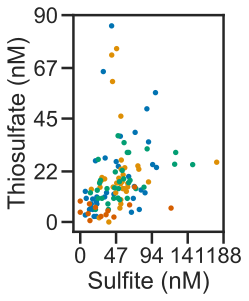

In [12]:
#Group by core
df_group = df_sulfite_thiosulfate_crossplot.groupby("Core")

fig, ax = plt.subplots(figsize=(2.7,4))
for i, (group,data) in enumerate(df_group):
    # Get Unique core labels
    color_labels = sort(df_sulfite_thiosulfate_crossplot['Core'].unique())
    # Define colors
    colors = sns.color_palette("colorblind", len(color_labels))
    # Create dictionary that pairs core labels with colors
    color_map = dict(zip(color_labels, colors))
    # Map core labels to the colors
    color = data['Core'].map(color_map)
    
    #Make errorbar plot
    ax.scatter(data['Conc_nM_sulfite'], data['Conc_nM_thiosulfate'], s=12)

    #Invert y axis
    ax.invert_yaxis()
    ax.set_xlabel('Sulfite (nM)')
    ax.set_ylabel('Thiosulfate (nM)')
    ax.set_xticks(np.linspace(0, (ax.get_xbound()[1]), 5).round(0))
    ax.set_yticks(np.linspace(0, (ax.get_ybound()[1]), 5).round(0))
    #ax.legend(bbox_to_anchor=(0.5, -0.25), ncol=4, loc = 'lower center')

#Save figure
fig.savefig('/Users/daniosro/OneDrive - California Institute of Technology/1. Adkins/SR2113/crossplot_sulfite_thiosulfate.pdf', bbox_inches='tight')